<a href="https://colab.research.google.com/github/gwenziro/pembelajaran-mesin-3H/blob/main/Kuis1_Kelompok_7_TI_3H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KELOMPOK 7:**
```
1. Putra Zakaria Muzaki(19) - 2241720220
2. Amanda Vanika Putri (03) - 2241720153
3. Muhammad Rayhan (17) - 2241720213
4.
```

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [ ]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}') # Orang yang memiliki min 10 gambar
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


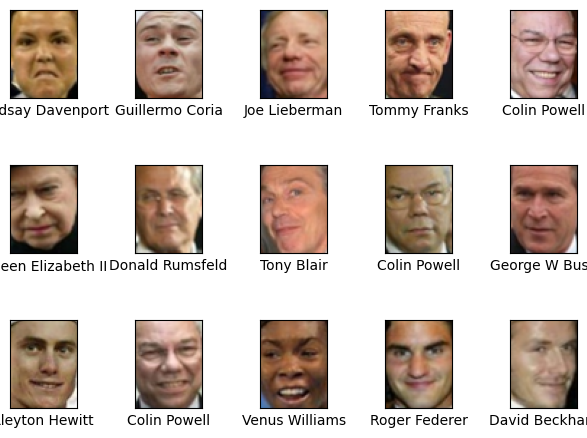

In [ ]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5) # membuat plot
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

In [ ]:
import cv2

# Function untuk penyesuaian ukuran gambar
def standarized_input(image):
    std_img = cv2.resize(image, (90,120))
    return std_img

# Function untuk prepocess
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        # Ubah ukuran gambar
        std_img = standarized_input(item)

        # # Convert BGR to RGB
        # std_img = cv2.cvtColor(std_img, cv2.COLOR_BGR2RGB)
        std_img_list.append(std_img)
    return std_img_list

    # std_img_list = np.array(std_img_list)
    # n_samples, h, w, c = std_img_list.shape

    # std_img_list = std_img_list.reshape(n_samples, h*w*c)

    # # Standarisasi
    # scaler = StandardScaler()
    # std_img_list = scaler.fit_transform(std_img_list)
    # return std_img_list.reshape(n_samples, h, w, c)

In [ ]:
faces_std = preprocess(faces.images)

print("Shape of processed images:", faces_std[0].shape)

Shape of processed images: (120, 90, 3)


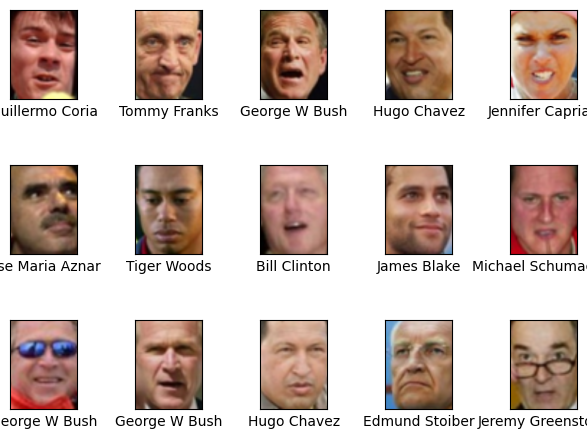

In [ ]:
# Menampilkan data yang sudah dipraprocessing
fig, ax = plt.subplots(3, 5) # membuat plot
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(np.clip(faces_std[rand_labels[i]], 0, 1), cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Features Extraction - Histogram

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

'\n    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.\n    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.\n\n    Hints:\n        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,\n        Anda dapat menggunakan fungsi np.histrogram dari library numpy\n'

In [ ]:
# Function untuk ekstrasi histogram setiap channel warna
def generate_hist(data, bins_num=8): # bins_num untuk interval warna yang digunakan
    hist_data = []

    for i in data:
        h_red = np.histogram(i[0][..., 0].ravel(), bins=bins_num)[0]
        h_green = np.histogram(i[1][..., 1].ravel(), bins=bins_num)[0]
        h_blue = np.histogram(i[2][..., 2].ravel(), bins=bins_num)[0]
        # ravel() untuk meratakan array menjadi 1D

        h_concat = np.concatenate((h_red, h_green, h_blue), axis=0) # Concat in row basis

        hist_data.append(h_concat)

    return np.array(hist_data)

In [ ]:
hist_features = generate_hist(faces_std)
hist_features.shape # (banyak_sample, fitur)

(4324, 24)

# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

'\n    Pada bagian ini lakukan proses pembuatan model,\n\n    1. Pembuatan data training dan data testing\n    2. Pembuatan objek model\n    3. Proses fitting model\n'

In [ ]:
# Build a Model

X_train, X_test, y_train, y_test = train_test_split(hist_features, faces.target, test_size=0.2, random_state=0, stratify=faces.target)

model = SVC()

model.fit(X_train, y_train)

SVC()

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

'\n    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing\n    dengan menggunakan metric akurasi dan juga classfication report\n\n    Hints:\n        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5\n'

In [ ]:
# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.17374963862387974
Accuracy on test: 0.14104046242774568


In [ ]:
# Classification Report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred, target_names=faces.target_names))


Classification Report for Test Data:
                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         4
             Adrien Brody       0.00      0.00      0.00         2
         Alejandro Toledo       0.25      0.12      0.17         8
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         4
             Andre Agassi       0.00      0.00      0.00         7
             Andy Roddick       0.00      0.00      0.00         3
           Angelina Jolie       0.00      0.00      0.00         4
              Ann Veneman       0.00      0.00      0.00         2
          Anna Kournikova       0.00      0.00      0.00         2
            Ari Fleischer       0.00      0.00      0.00         3
             Ariel Sharon       0.00      0.00      0.00        16
    Arnold Schwarzenegger       0.00      0.00      0.00         8
     Atal Bihari Vajpay

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Ekstrasi Fitur - HOG (Histogram of Oriented Gradients)

In [ ]:
from skimage.feature import hog
from skimage import color

def generate_hog_features(images):
    hog_features = []
    for img in images:
        # Konversi ke grayscale sebelum ekstraksi HOG
        gray_img = color.rgb2gray(img)
        h = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features.append(h)
    return np.array(hog_features)

In [ ]:
hog_features = generate_hog_features(faces_std)
hog_features.shape # (banyak_sample, fitur)

(4324, 5040)

In [ ]:
# Build a Model

X_train, X_test, y_train, y_test = train_test_split(hog_features, faces.target, test_size=0.2, random_state=0, stratify=faces.target)

model = SVC()

model.fit(X_train, y_train)

SVC()

In [ ]:
# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8407054061867592
Accuracy on test: 0.3514450867052023


## Confusion Matrix - Data Train

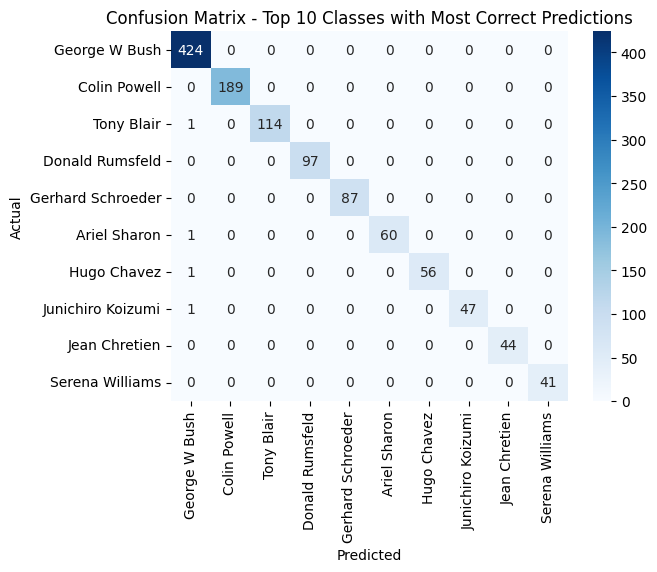

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah prediksi benar (nilai diagonal)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
correct_predictions = np.diag(conf_matrix_train)

# Urutkan kelas berdasarkan prediksi benar terbanyak
top_10_indices = np.argsort(correct_predictions)[-10:][::-1]  # Ambil 10 terbesar

# Filter confusion matrix hanya untuk 10 kelas dengan prediksi benar terbanyak
conf_matrix_top_10 = conf_matrix_train[top_10_indices][:, top_10_indices]

# Ambil nama-nama kelas yang sesuai
top_10_classes = faces.target_names[top_10_indices]

# Visualisasi Confusion Matrix untuk 10 kelas dengan prediksi benar terbanyak
sns.heatmap(conf_matrix_top_10, annot=True, fmt='d', cmap='Blues',
            xticklabels=top_10_classes, yticklabels=top_10_classes)
plt.title('Confusion Matrix - Top 10 Classes with Most Correct Predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Confusion Matrix - Data Test

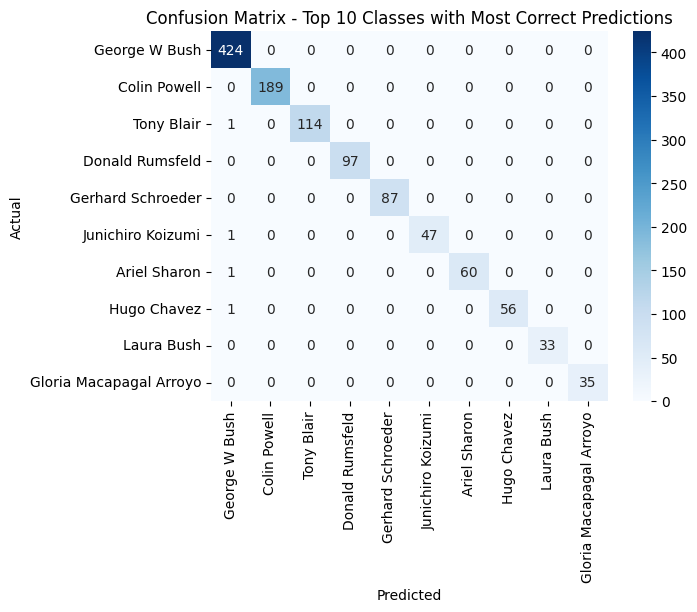

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah prediksi benar (nilai diagonal)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
correct_predictions = np.diag(conf_matrix_test)

# Urutkan kelas berdasarkan prediksi benar terbanyak
top_10_indices = np.argsort(correct_predictions)[-10:][::-1]  # Ambil 10 terbesar

# Filter confusion matrix hanya untuk 10 kelas dengan prediksi benar terbanyak
conf_matrix_top_10 = conf_matrix_train[top_10_indices][:, top_10_indices]

# Ambil nama-nama kelas yang sesuai
top_10_classes = faces.target_names[top_10_indices]

# Visualisasi Confusion Matrix untuk 10 kelas dengan prediksi benar terbanyak
sns.heatmap(conf_matrix_top_10, annot=True, fmt='d', cmap='Blues',
            xticklabels=top_10_classes, yticklabels=top_10_classes)
plt.title('Confusion Matrix - Top 10 Classes with Most Correct Predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Ekstrasi Fitur - PCA (Principal Component Analysis)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def generate_pca_features(images):
    # Konversi daftar ke array NumPy
    images_array = np.array(images)

    # Flatten the images
    n_samples, h, w, c = images_array.shape
    X_flattened = images_array.reshape(n_samples, -1)  # Mengubah menjadi (banyak_sample, tinggi * lebar * saluran)

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_flattened)

    # Apply PCA
    n_components = 100  # Jumlah komponen utama yang ingin Anda pertahankan
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    return X_pca

In [ ]:
pca_features = generate_pca_features(faces_std)
pca_features.shape # (banyak_sample, fitur)

(4324, 100)

In [ ]:
# Build a Model

X_train, X_test, y_train, y_test = train_test_split(pca_features, faces.target, test_size=0.2, random_state=0, stratify=faces.target)

model = SVC()

model.fit(X_train, y_train)

SVC()

In [ ]:
# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.6160740098294305
Accuracy on test: 0.3260115606936416


## Model - K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Uji model KNN dengan beberapa nilai k
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=8, scoring='accuracy')
    k_scores.append(scores.mean())

# Mencari nilai maksimum dan indeksnya
best_accuracy = max(k_scores)
best_k = k_scores.index(best_accuracy) + 1  # +1 karena index dimulai dari 0

print(f'Nilai k terbaik: {best_k}')
print(f'Akurasi tertinggi: {best_accuracy * 100:.2f}%')


Nilai k terbaik: 1
Akurasi tertinggi: 25.38%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Build model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=1)

# 2. Fit model pada data PCA
knn_model.fit(X_train, y_train)

# 3. Prediksi pada data testing
y_test_pred_knn = knn_model.predict(X_test)

# 4. Evaluasi model
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f'Akurasi pada data testing (KNN): {test_accuracy_knn * 100:.2f}%')

print("\nLaporan Klasifikasi pada Data Testing (KNN):\n")
print(classification_report(y_test, y_test_pred_knn, target_names=faces.target_names))

Akurasi pada data testing (KNN): 24.74%

Laporan Klasifikasi pada Data Testing (KNN):

                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         4
             Adrien Brody       0.50      0.50      0.50         2
         Alejandro Toledo       0.06      0.12      0.08         8
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         4
             Andre Agassi       0.33      0.14      0.20         7
             Andy Roddick       0.00      0.00      0.00         3
           Angelina Jolie       0.00      0.00      0.00         4
              Ann Veneman       0.00      0.00      0.00         2
          Anna Kournikova       0.00      0.00      0.00         2
            Ari Fleischer       0.67      0.67      0.67         3
             Ariel Sharon       0.24      0.38      0.29        16
    Arnold Schwarzenegger       0.14     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model - Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(pca_features, faces.target, test_size=0.2, random_state=0, stratify=faces.target)

# Inisialisasi model Naive Bayes
model_nb = GaussianNB()

# Melatih model
model_nb.fit(X_train, y_train)

# Evaluasi model
y_train_pred = model_nb.predict(X_train)
y_test_pred = model_nb.predict(X_test)

# Akurasi dan laporan klasifikasi
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f'Accuracy on train: {acc_train:.4f}')
print(f'Accuracy on test: {acc_test:.4f}')
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Accuracy on train: 0.8445
Accuracy on test: 0.4162

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.00      0.00      0.00         2
           2       0.38      0.38      0.38         8
           3       0.67      0.57      0.62         7
           4       0.50      0.25      0.33         4
           5       0.12      0.43      0.19         7
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         2
           9       0.33      0.50      0.40         2
          10       1.00      0.67      0.80         3
          11       0.41      0.56      0.47        16
          12       0.09      0.12      0.11         8
          13       0.33      0.20      0.25         5
          14       0.50      0.33      0.40         6
          15       1.00      0.33      0.50     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
